In [1]:
import pandas as pd

In [2]:
hd = pd.read_csv(r'C:\Users\harsh\Documents\HeartDiseasePrediction\Heart Disease Prediction\Dataset\HeartDisease.csv')

In [3]:
hd.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
hd_train, hd_test = train_test_split(hd, test_size = .2) 

In [8]:
hd_train_x  = hd_train.iloc[: , 0:-1]
hd_train_y  = hd_train.iloc[: , -1]

hd_test_x  = hd_test.iloc[: , 0:-1]
hd_test_y  = hd_test.iloc[: , -1]

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10,
                           min_samples_split = 150)

In [10]:
dt.fit(hd_train_x, hd_train_y)

DecisionTreeClassifier(max_depth=10, min_samples_split=150)

In [11]:
pred_hd = dt.predict(hd_test_x)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
tab_hd = confusion_matrix(hd_test_y, pred_hd)
tab_hd

array([[21,  8],
       [ 8, 24]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(hd_test_y, pred_hd)

0.7377049180327869

In [16]:
dt.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
df = pd.DataFrame({'Feature':hd_train_x.columns,'Values':dt.feature_importances_})
df.sort_values('Values',ascending=False)

,Feature,Values
2,chest_pain,1.0
0,age,0.0
1,gender,0.0
3,rest_bps,0.0
4,cholestrol,0.0
5,fasting_blood_sugar,0.0
6,rest_ecg,0.0
7,thalach,0.0
8,exer_angina,0.0
9,old_peak,0.0


In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydot
from IPython.display import Image

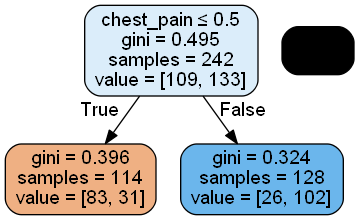

<Figure size 864x864 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(12,12))
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=hd_train_x.columns )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())